In [200]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
import random
import math
from tensorflow.keras.models import Sequential
import PIL

##### One way of importing data using cv2. but is in worng colour format. 

In [2]:
list_test_fire = []
path = "C:/Users/Home/OneDrive/CE888/Test/Fire/*"
for file in glob.glob(path):
    a=cv2.imread(file)
    list_test_fire.append(a)   

In [3]:
list_test_nofire = []
path = "C:/Users/Home/OneDrive/CE888/Test/No_Fire/*"
for file in glob.glob(path):
    a=cv2.imread(file)
    list_test_nofire.append(a)

In [4]:
list_training_fire = []
path = "C:/Users/Home/OneDrive/CE888/Training/Fire/*"
for file in glob.glob(path):
    a=cv2.imread(file)
    list_training_fire.append(a)


In [5]:
list_training_nofire = []
path = "C:/Users/Home/OneDrive/CE888/Training/No_Fire/*"
for file in glob.glob(path):
    a=cv2.imread(file)
    list_training_nofire.append(a)

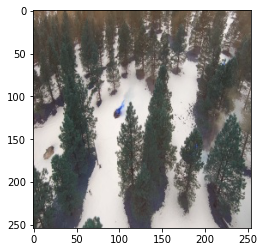

In [6]:
plt.imshow(list_test_fire[50])

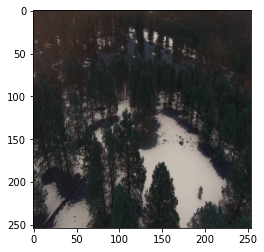

In [7]:
plt.imshow(list_test_nofire[50])

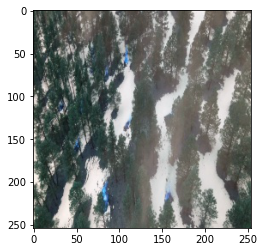

In [8]:
plt.imshow(list_training_fire[50])

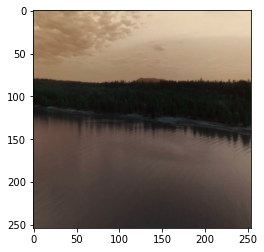

In [9]:
plt.imshow(list_training_nofire[50])

In [10]:
len(list_test_fire)

5137

In [11]:
len(list_test_nofire)

3480

In [12]:
len(list_training_fire)

25018

In [13]:
len(list_training_nofire)

14357

In [14]:
##I was considering using this to change format from BGR to RGB but this obvioulsy store this on my hard drive and my laptop 
## could not do this easily. Might be useful later... 

##path = "C:/Users/Home/OneDrive/CE888/Test/Fire/*"
##img_number = 1
##for file in glob.glob(path):
    #a = cv2.imread(file)
    #c = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    #cv2.imwrite("C:/Users/Home/OneDrive/CE888/Test/Fire/Color_image"+str(img_number)+".jpg", c)
    #cv2.imshow('Color image', c)
    
    

### Importing data into TensorFlow

In [241]:
image_height = 224
image_width = 224
batch_size = 32

In [289]:
### Use ImageDataGenerator to set conditions for data augmentation 

train_datagen = ImageDataGenerator(
    rotation_range = 15,
    horizontal_flip = True,
    vertical_flip = True,
    data_format = "channels_last",
    dtype = tf.float32,
    validation_split=0.15,
    
)

In [290]:
## Retrive data from path and augment, split into training/validation set

train = train_datagen.flow_from_directory(
      "C:/Users/Home/OneDrive/CE888/Training/",
       target_size = (image_height, image_width),
       batch_size=32,
       color_mode="rgb",
       shuffle=True,
       subset="training",
       
)

Found 33470 images belonging to 2 classes.


In [291]:
validation_datagen = ImageDataGenerator(rescale=1.0/255, dtype=tf.float32, validation_split=0.15)

In [292]:
validation = validation_datagen.flow_from_directory(
      "C:/Users/Home/OneDrive/CE888/Training/",
       target_size = (image_height, image_width),
       batch_size=32,
       color_mode="rgb",
       shuffle=True,
       subset="validation",
)

Found 5905 images belonging to 2 classes.


In [293]:
test_datagen = ImageDataGenerator(rescale=1.0/255, dtype=tf.float32)

In [294]:
test = test_datagen.flow_from_directory(
     "C:/Users/Home/OneDrive/CE888/Test/",
      target_size = (image_height, image_width),
      batch_size=32,
      color_mode="rgb",
      shuffle=True,
)

Found 8617 images belonging to 2 classes.


In [242]:
## Other method for importing data in to test/validation set. Might be useful later...
    
#ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
     #"C:/Users/Home/OneDrive/CE888/Training/",
     # labels='inferred',
     # color_mode="rgb",
     # batch_size=32,
     # image_size= (image_height, image_width),
     # shuffle=True,
    #  seed=123,
    # validation_split=0.15,
    #  subset="validation",
#)

Found 39375 files belonging to 2 classes.
Using 5906 files for validation.


In [243]:
## As above

#ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    # "C:/Users/Home/OneDrive/CE888/Training/", #path
      #labels='inferred', #use exisiting 
      #color_mode="rgb", #red, green, blue
      #batch_size=32,
      #image_size=(image_height, image_width),
      #shuffle=True,
      #seed=123,
      #validation_split=0.15, #15% train/vaildation split 
      #subset="training",
#)

Found 39375 files belonging to 2 classes.
Using 33469 files for training.


In [300]:
## As above 

#ds_test = tf.keras.preprocessing.image_dataset_from_directory(
     #"C:/Users/Home/OneDrive/CE888/Test/",
      #labels='inferred',
      #color_mode="rgb",
      #batch_size=32,
      #image_size=(image_height, image_width),
      #shuffle=True,
#)

In [245]:
#### Data augmentation function - NOT NEEDED! Might be useful later...

#def augment(image, label):
    #new_height = new_width = 224
    #image = tf.image.resize(image, (new_height, new_width)) #resize image to 32x32, this arbitray now and will be amendeded later 
    #image = tf.image.random_brightness(image, max_delta=0.1) #change brightness lsightly by 0.1 delta 
    #image = tf.image.random_flip_left_right(image) #randomly flip images left/right 50% of the time 
    #image = tf.image.random_flip_up_down(image) #randomly flip images up/down 50% of the time
    #return image, label

    

In [248]:
# map 
##ds_train = ds_train.map(augment)

In [276]:
model = keras.applications.resnet50.ResNet50(weights="imagenet")

In [263]:
## Trail model 
#model = keras.Sequential([
    #layers.Input((28, 28, 3)),
    #layers.Conv2D(16, 3, padding='same'),
    #layers.Conv2D(32, 3, padding='same'),
    #layers.MaxPooling2D(),
    #layers.Flatten(),
    #layers.Dense(10),
#])

In [266]:
## Trail model 
#model.compile(
    #optimizer = keras.optimizers.Adam(),
    #loss = [keras.losses.SparseCategoricalCrossentropy(from_logits=True)],
    #metrics = ["accuracy"],
#)

In [303]:
 ## inputs = keras.applications.resnet50.preprocess_input(test * 255)